Step 1: Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


Step 2: Load Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Step 3: Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


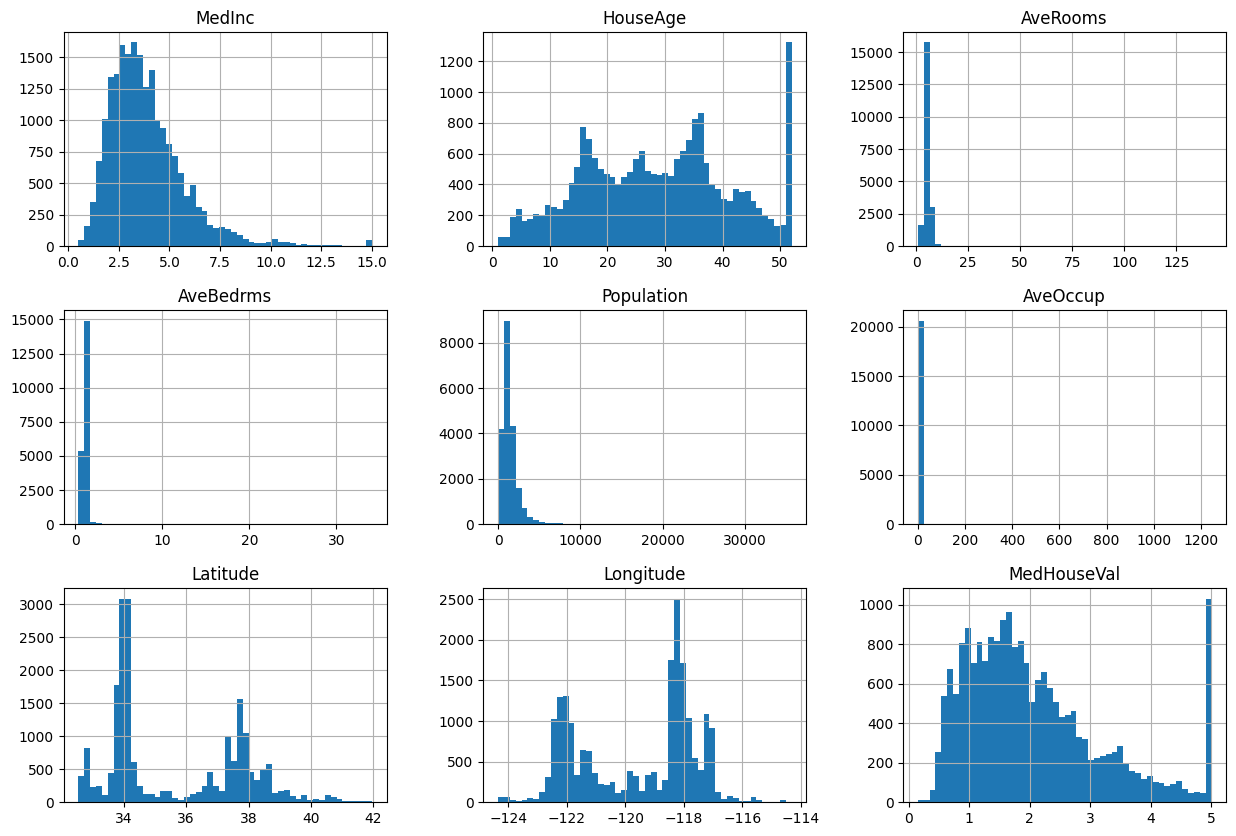

In [3]:
df.info()
df.describe()
df.hist(bins=50, figsize=(15, 10))
plt.show()


Step 4: Correlation Matrix

<Axes: >

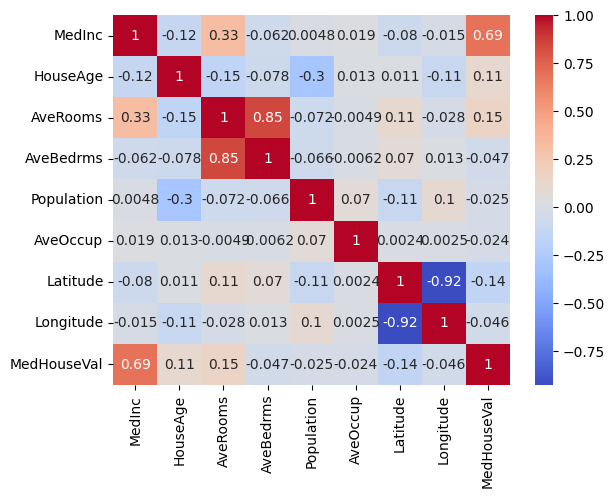

In [4]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")


Step 5: Train/Test Split

In [5]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


Step 6: Data Preprocessing

In [6]:
num_features = df.drop("MedHouseVal", axis=1).select_dtypes(include=[np.number]).columns.tolist()

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features)
])

X_train = train_set.drop("MedHouseVal", axis=1)
y_train = train_set["MedHouseVal"]
X_prepared = full_pipeline.fit_transform(X_train)


Step 7: Linear Regression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_prepared, y_train)

some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [1.93725845 2.48910616 2.64735483 1.56589492 1.61312839]
Labels: [1.03, 3.821, 1.726, 0.934, 0.965]


Step 8: Random Forest + Grid Search

In [8]:
param_grid = [
    {'n_estimators': [30, 50, 100], 'max_features': [4, 6, 8]}
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_prepared, y_train)
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

Step 9: Final Evaluation

In [9]:
X_test = test_set.drop("MedHouseVal", axis=1)
y_test = test_set["MedHouseVal"]
X_test_prepared = full_pipeline.transform(X_test)

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Final RMSE on Test Set:", final_rmse);

Final RMSE on Test Set: 0.5002620743648502
